In [ ]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import tweepy

In [ ]:
data = pd.read_csv("/content/Elon_musk.csv",encoding='Latin-1')

In [ ]:
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
data.drop(['Unnamed: 0'],inplace=True,axis=1)

In [ ]:
data.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [ ]:
data.tail()

,Text
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...
1998,Progress update August 28


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [ ]:
#cleaning the text

def cleantxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '',text)
  text = re.sub(r'#','',text)
  text = re.sub(r'RT[\s]+','',text)
  text = re.sub(r'https?:\/\/\S+','',text)
  return text

data.Text = data.Text.apply(cleantxt)
data

,Text
0,Im an alien
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
2,Great interview!
3,Doge is underestimated
4,Congratulations Tesla China for amazing execu...
...,...
1994,"True, it sounds so surreal, but the negative ..."
1995,Make sure to read ur terms &amp; conditions b...
1996,Samwise Gamgee
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...


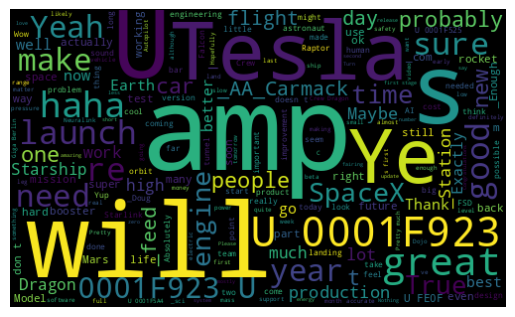

In [ ]:
#plot the word cloud
allWords = ' '.join(twts for twts in data.Text)
wordCloud =WordCloud(width=500, height=300, random_state = 21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#To get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

data['Subjectivity'] = data['Text'].apply(getSubjectivity)
data['Polarity'] = data['Text'].apply(getPolarity)


In [ ]:
data

,Text,Subjectivity,Polarity
0,Im an alien,0.750000,-0.250000
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000
2,Great interview!,0.750000,1.000000
3,Doge is underestimated,0.000000,0.000000
4,Congratulations Tesla China for amazing execu...,0.366667,0.345313
...,...,...,...
1994,"True, it sounds so surreal, but the negative ...",0.508333,0.111111
1995,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000
1996,Samwise Gamgee,0.000000,0.000000
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000


In [ ]:
#To compute the negative , neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return "positive"

data['analysis'] = data['Polarity'].apply(getAnalysis)

In [ ]:
data

,Text,Subjectivity,Polarity,analysis
0,Im an alien,0.750000,-0.250000,Negative
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Neutral
2,Great interview!,0.750000,1.000000,positive
3,Doge is underestimated,0.000000,0.000000,Neutral
4,Congratulations Tesla China for amazing execu...,0.366667,0.345313,positive
...,...,...,...,...
1994,"True, it sounds so surreal, but the negative ...",0.508333,0.111111,positive
1995,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000,positive
1996,Samwise Gamgee,0.000000,0.000000,Neutral
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000,Negative


In [ ]:
#Print all of the Negative tweets
j=1
sortedDf  = data.sort_values(by=['Polarity'])
for i in range(0, sortedDf.shape[0]):
  if(sortedDf['analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDf['Text'][i])
    print()
    j = j+1


1)  Im an alien

2)  Your app sucks

3)  _ Starlink is a staggeringly difficult technical &amp; economic endeavor. However, if we don 

4)  _ SpaceX needs to pass through a deep chasm of negative cash flow over the next year or 

5)  Everyone at Tesla receives stock. 

My comp is all stock/options, which I do not take off the table. 

Thats what youre missing.

6)  Doge appears to be inflationary, but is not meaningfully so (fixed  of coins per unit time), whereas 

7)   It was foolish of us not to start 3 engines &amp; immediately shut down 1, as 2 are needed to land

8)  We were too dumb

9) This was a tough one 

10) : This mission enables access for everyday people who dream of going to space

11) _feed Earth is small &amp; we are smaller still 

12)  _Ryan A little

13) _7TeslaNews  Yeah, probably in a few months

14)  After you drive without using a PRND stalk/stick for a few days, it gets very annoying to go back &amp; use a shifter!

15)  No more stalks. Car guesses drive

In [ ]:
#print Positive tweets
j=1
sortedDf  = data.sort_values(by=['Polarity'])
for i in range(0, sortedDf.shape[0]):
  if(sortedDf['analysis'][i] == 'positive'):
    print(str(j) + ') '+sortedDf['Text'][i])
    print()
    j = j+1


1)   Great interview!

2)  Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!

3) Happy New Year of the Ox! 

4) _   Haha thanks :)

5) The most entertaining outcome is the most likely

6)   Its getting real

7)  He definitely has issues, but the sentencing seems a bit high

8)  Thanks for fixing

9) This is true power haha 

10) : NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission! 

11)   _ Once we can predict cash flow reasonably well, Starlink will IPO

12)   Does seem a bit high

13)   Wow

14) _7_42  So cute <U+0001F495>

15)  Extremely misleading image, as doesnt reflect true time cost to people or rain &amp; pain

16)  Its the most fun crypto!

17)  True

18)   Not that easy. This is two decades of intense work. Have to look at old notes, emails, texts.

19)  Have you read ? Its great!!

20) _ Sure

21) The great thing about restaurants is that you get to hang out with st

In [ ]:
j=1
sortedDf  = data.sort_values(by=['Polarity'])
for i in range(0, sortedDf.shape[0]):
  if(sortedDf['analysis'][i] == 'Neutral'):
    print(str(j) + ') '+sortedDf['Text'][i])
    print()
    j = j+1


1) _AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?

2)  Doge is underestimated

3) Frodo was the underdoge,
All thought he would fail,
Himself most of all. 

4)   Indeed! Tweets definitely do not represent real-world time allocation.

5)  Just sent some

6) Just agree to do Clubhouse with 

7) 

8) Bought some Dogecoin for lil X, so he can be a toddler hodler

9)  Please unlock my account

10)  <U+0001F923><U+0001F923>

11)  Any crypto wallet that wont give you your private keys should be avoided at all costs

12)  Yes

13) _AA_Carmack Lowest cost per ton of carbon sequestered, net of value of any product made. 

Must be scalable to g 

14) _ Its meant to be the same price in all countries. Only difference should be taxes &amp; shipping.

15)  This is intended for Earth, but there may be some ideas that apply to Mars too

16)    _Z_Palmer <U+0001F923><U+0001F923>

17) XPrize team will manage the $100M carbon capture prize 

18) Back to work I go 

19

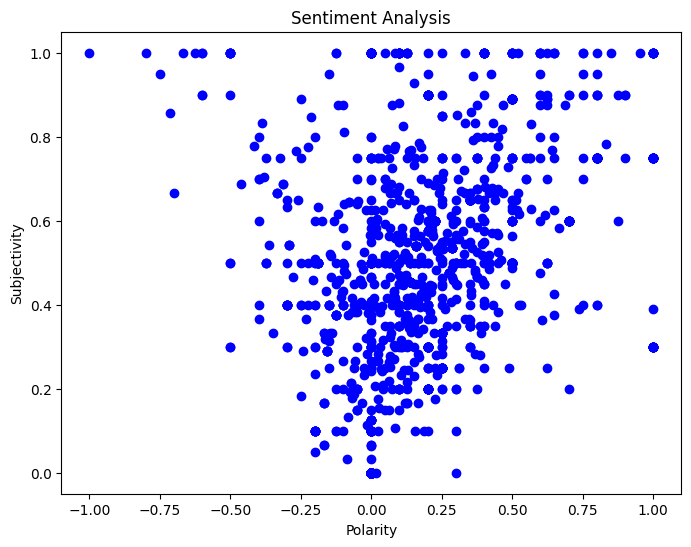

In [ ]:
#Plot the polarity and subjectivity

plt.figure(figsize=(8,6))
for i in range(0 , data.shape[0]):
  plt.scatter(data['Polarity'][i], data['Subjectivity'][i],color='Blue')

plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# Percentage of Positive Tweets
ptwt = data[data.analysis == 'positive']
ptwt = ptwt['Text']

round((ptwt.shape[0] / data.shape[0])*100, 1)

44.2

In [ ]:
# Percentage of Negative Tweets
ntwt = data[data.analysis == 'Negative']
ntwt = ntwt['Text']

round((ntwt.shape[0] / data.shape[0])*100, 1)

11.0

In [ ]:
# Percentage of Neutral Tweets
nttwt = data[data.analysis == 'Neutral']
nttwt = nttwt['Text']

round((nttwt.shape[0] / data.shape[0])*100, 1)

44.8

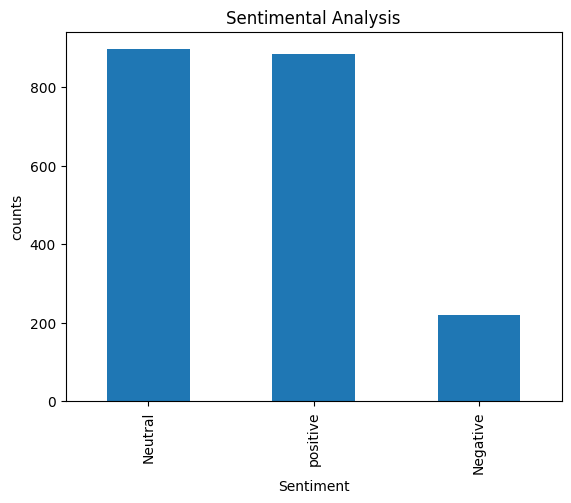

In [ ]:
# Value Counts and visualization
data['analysis'].value_counts()

plt.title('Sentimental Analysis')
plt.xlabel('Sentiment')
plt.ylabel('counts')
data['analysis'].value_counts().plot(kind='bar')
plt.show()